## Problem statement:
This business problem is a supervised learning example for a credit card company. The objective is to predict the probability of default (whether the customer will pay the credit card bill or not) based on the variables provided. There are multiple variables on the credit card account, purchase and delinquency information which can be used in the modelling. PD modelling problems are meant for understanding the riskiness of the customers and how much credit is at stake in case the customer defaults. This is an extremely critical part in any organization that lends money [both secured and unsecured loans]. Refer to the Sheet 2 of the PD_modelling_dataset for the Data Dictionary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("C:/Users/ASUS/Downloads/Banking_Project (1)/PD_modelling_dataset.xlsx")

In [3]:
df.head(10)

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,NaN,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
5,1534132.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.328333
6,1179589.0,0.0,0.0,0.0,142.0,0.0,0.000000,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2182448.0,0.0,57229.0,0.0,0.0,0.0,0.232244,1.0,1.0,1.0,...,257.0,0.0,1.0,1.0,1.0,0.0,42206.0,35336.0,457257.0,12.192778
8,1661559.0,0.0,148922.0,0.0,47.0,0.0,0.969055,1.0,2.0,2.0,...,2.0,3.0,2.0,2.0,2.0,0.0,104643.0,32381.0,24390.0,21.411111
9,4628751.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,10.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,78620.0,13.340833


In [4]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 99979 
The number of columns (variables) is 36


In [5]:
df.size

3599244

In [6]:
import pandas as pd




df1 = pd.DataFrame(df)


unique_defaults = df['default'].unique()

print("Unique values in the 'default' column:")
for value in unique_defaults:
    print(value)


Unique values in the 'default' column:
0.0
1.0
nan
10000.0


In [7]:
import pandas as pd


df.drop(df[(df['default'] == 10000.0) | (df['default'].isna())].index, inplace=True)

In [8]:

unique_defaults = df['default'].unique()

print("Unique values in the 'default' column:")
for value in unique_defaults:
    print(value)

Unique values in the 'default' column:
0.0
1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89976 entries, 0 to 89975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            89976 non-null  float64
 1   default                           89976 non-null  float64
 2   acct_amt_added_12_24m             89976 non-null  float64
 3   acct_days_in_dc_12_24m            79293 non-null  float64
 4   acct_days_in_rem_12_24m           79293 non-null  float64
 5   acct_days_in_term_12_24m          79293 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  36619 non-null  float64
 7   acct_status                       41042 non-null  float64
 8   acct_worst_status_0_3m            41042 non-null  float64
 9   acct_worst_status_12_24m          29921 non-null  float64
 10  acct_worst_status_3_6m            38038 non-null  float64
 11  acct_worst_status_6_12m           35663 non-null  float64
 12  age 

In [10]:

column_to_drop = 'userid'
df = df.drop(column_to_drop, axis=1)

In [11]:

column_to_drop2 = 'name_in_email'
df = df.drop(column_to_drop2, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89976 entries, 0 to 89975
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   default                           89976 non-null  float64
 1   acct_amt_added_12_24m             89976 non-null  float64
 2   acct_days_in_dc_12_24m            79293 non-null  float64
 3   acct_days_in_rem_12_24m           79293 non-null  float64
 4   acct_days_in_term_12_24m          79293 non-null  float64
 5   acct_incoming_debt_vs_paid_0_24m  36619 non-null  float64
 6   acct_status                       41042 non-null  float64
 7   acct_worst_status_0_3m            41042 non-null  float64
 8   acct_worst_status_12_24m          29921 non-null  float64
 9   acct_worst_status_3_6m            38038 non-null  float64
 10  acct_worst_status_6_12m           35663 non-null  float64
 11  age                               89976 non-null  float64
 12  avg_

In [13]:
df['default'].value_counts()

0.0    88688
1.0     1288
Name: default, dtype: int64

In [14]:
df['default'].value_counts(normalize = True)

0.0    0.985685
1.0    0.014315
Name: default, dtype: float64

In [15]:
df.duplicated().sum()

2652

In [16]:

duplicates = df[df.duplicated()]


print("Duplicate Rows:")
print(duplicates)




df_no_duplicates = df.drop_duplicates(keep=False)

print("\nDataFrame without any duplicates:")
print(df_no_duplicates)

Duplicate Rows:
       default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
408        0.0                    0.0                     0.0   
735        0.0                    0.0                     0.0   
1058       0.0                    0.0                     0.0   
1073       0.0                    0.0                     0.0   
1109       0.0                    0.0                     0.0   
...        ...                    ...                     ...   
89832      0.0                    0.0                     0.0   
89885      0.0                    0.0                     NaN   
89936      0.0                    0.0                     0.0   
89937      0.0                    0.0                     0.0   
89971      0.0                    0.0                     0.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
408                        0.0                       0.0   
735                        0.0                       0.0   
1058                   

In [17]:
df_no_duplicates.duplicated().sum()

0

In [18]:
df_no_duplicates.describe().T

,count,mean,std,min,25%,50%,75%,max
default,86896.0,0.014650,0.120147,0.000000,0.000000,0.000000,0.000000,1.000000e+00
acct_amt_added_12_24m,86896.0,12711.278701,36009.871970,0.000000,0.000000,0.000000,5968.000000,1.128775e+06
acct_days_in_dc_12_24m,76555.0,0.225106,5.729615,0.000000,0.000000,0.000000,0.000000,3.620000e+02
acct_days_in_rem_12_24m,76555.0,5.255307,23.344343,0.000000,0.000000,0.000000,0.000000,3.650000e+02
acct_days_in_term_12_24m,76555.0,0.298191,2.982131,0.000000,0.000000,0.000000,0.000000,9.700000e+01
acct_incoming_debt_vs_paid_0_24m,36589.0,1.331390,26.935738,0.000000,0.000000,0.154283,0.665430,3.914000e+03
acct_status,40991.0,1.041716,0.201886,1.000000,1.000000,1.000000,1.000000,4.000000e+00
acct_worst_status_0_3m,40991.0,1.173502,0.420912,1.000000,1.000000,1.000000,1.000000,4.000000e+00
acct_worst_status_12_24m,29910.0,1.339351,0.575724,1.000000,1.000000,1.000000,2.000000,4.000000e+00
acct_worst_status_3_6m,38001.0,1.185574,0.442996,1.000000,1.000000,1.000000,1.000000,4.000000e+00


In [19]:
pd.options.display.float_format = '{:.2f}'.format   

df_no_duplicates.describe().T

,count,mean,std,min,25%,50%,75%,max
default,86896.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00
acct_amt_added_12_24m,86896.00,12711.28,36009.87,0.00,0.00,0.00,5968.00,1128775.00
acct_days_in_dc_12_24m,76555.00,0.23,5.73,0.00,0.00,0.00,0.00,362.00
acct_days_in_rem_12_24m,76555.00,5.26,23.34,0.00,0.00,0.00,0.00,365.00
acct_days_in_term_12_24m,76555.00,0.30,2.98,0.00,0.00,0.00,0.00,97.00
acct_incoming_debt_vs_paid_0_24m,36589.00,1.33,26.94,0.00,0.00,0.15,0.67,3914.00
acct_status,40991.00,1.04,0.20,1.00,1.00,1.00,1.00,4.00
acct_worst_status_0_3m,40991.00,1.17,0.42,1.00,1.00,1.00,1.00,4.00
acct_worst_status_12_24m,29910.00,1.34,0.58,1.00,1.00,1.00,2.00,4.00
acct_worst_status_3_6m,38001.00,1.19,0.44,1.00,1.00,1.00,1.00,4.00


In [20]:
df_no_duplicates.isnull().sum()

default                                 0
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m              10341
acct_days_in_rem_12_24m             10341
acct_days_in_term_12_24m            10341
acct_incoming_debt_vs_paid_0_24m    50307
acct_status                         45905
acct_worst_status_0_3m              45905
acct_worst_status_12_24m            56986
acct_worst_status_3_6m              48895
acct_worst_status_6_12m             51266
age                                     0
avg_payment_span_0_12m              18562
avg_payment_span_0_3m               41371
merchant_category                       0
merchant_group                          9
has_paid                             6868
max_paid_inv_0_12m                   6868
max_paid_inv_0_24m                   6868
num_active_div_by_paid_inv_0_12m    23856
num_active_inv                       6868
num_arch_dc_0_12m                    6868
num_arch_dc_12_24m                   6868
num_arch_ok_0_12m                 

In [21]:
df_no_duplicates.isnull().sum()[df_no_duplicates.isnull().sum()>0]

acct_days_in_dc_12_24m              10341
acct_days_in_rem_12_24m             10341
acct_days_in_term_12_24m            10341
acct_incoming_debt_vs_paid_0_24m    50307
acct_status                         45905
acct_worst_status_0_3m              45905
acct_worst_status_12_24m            56986
acct_worst_status_3_6m              48895
acct_worst_status_6_12m             51266
avg_payment_span_0_12m              18562
avg_payment_span_0_3m               41371
merchant_group                          9
has_paid                             6868
max_paid_inv_0_12m                   6868
max_paid_inv_0_24m                   6868
num_active_div_by_paid_inv_0_12m    23856
num_active_inv                       6868
num_arch_dc_0_12m                    6868
num_arch_dc_12_24m                   6868
num_arch_ok_0_12m                    6868
num_arch_ok_12_24m                   6868
num_arch_rem_0_12m                   6868
status_max_archived_0_6_months       6868
status_max_archived_0_12_months   

In [22]:
df_no_duplicates.shape

(86896, 34)

In [23]:
import pandas as pd


null_percentage = (df_no_duplicates.isnull().sum() / len(df_no_duplicates)) * 100

columns_to_drop = null_percentage[null_percentage > 30].index

df_no_duplicates.drop(columns=columns_to_drop, inplace=True)


In [24]:
null_percentage

default                             0.00
acct_amt_added_12_24m               0.00
acct_days_in_dc_12_24m             11.90
acct_days_in_rem_12_24m            11.90
acct_days_in_term_12_24m           11.90
acct_incoming_debt_vs_paid_0_24m   57.89
acct_status                        52.83
acct_worst_status_0_3m             52.83
acct_worst_status_12_24m           65.58
acct_worst_status_3_6m             56.27
acct_worst_status_6_12m            59.00
age                                 0.00
avg_payment_span_0_12m             21.36
avg_payment_span_0_3m              47.61
merchant_category                   0.00
merchant_group                      0.01
has_paid                            7.90
max_paid_inv_0_12m                  7.90
max_paid_inv_0_24m                  7.90
num_active_div_by_paid_inv_0_12m   27.45
num_active_inv                      7.90
num_arch_dc_0_12m                   7.90
num_arch_dc_12_24m                  7.90
num_arch_ok_0_12m                   7.90
num_arch_ok_12_2

In [25]:
null_percentage.shape

(34,)

In [26]:
df_no_duplicates.shape

(86896, 27)

In [27]:
df_X = df_no_duplicates.drop('default', axis = 1)
df_Y = df_no_duplicates['default']

In [28]:
df_X.head()

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,avg_payment_span_0_12m,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.00,0.00,0.00,0.00,20.00,12.69,Dietary supplements,Health & Beauty,True,31638.00,...,14.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,178839.00,9.65
1,0.00,0.00,0.00,0.00,50.00,25.83,Books & Magazines,Entertainment,True,13749.00,...,19.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,49014.00,13.18
2,0.00,0.00,0.00,0.00,22.00,20.00,Diversified entertainment,Entertainment,True,29890.00,...,0.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,124839.00,11.56
3,0.00,nan,nan,nan,36.00,4.69,Diversified entertainment,Entertainment,True,40040.00,...,21.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,324676.00,15.75
4,0.00,0.00,0.00,0.00,25.00,13.00,Electronic equipment & Related accessories,Electronics,True,7100.00,...,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,7100.00,12.70


In [29]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR


In [30]:
((df_X > UL) | (df_X < LL)).sum()

acct_amt_added_12_24m               16575
acct_days_in_dc_12_24m                232
acct_days_in_rem_12_24m              8718
acct_days_in_term_12_24m             1096
age                                   399
avg_payment_span_0_12m               4817
has_paid                                0
max_paid_inv_0_12m                   5363
max_paid_inv_0_24m                   5735
merchant_category                       0
merchant_group                          0
num_active_div_by_paid_inv_0_12m     7475
num_active_inv                       4821
num_arch_dc_0_12m                    3423
num_arch_dc_12_24m                   3218
num_arch_ok_0_12m                    7167
num_arch_ok_12_24m                   7666
num_arch_rem_0_12m                  18985
recovery_debt                         179
status_max_archived_0_12_months         5
status_max_archived_0_24_months        13
status_max_archived_0_6_months       1436
sum_capital_paid_acct_0_12m         12801
sum_capital_paid_acct_12_24m      

In [31]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [32]:
df_X.isnull().sum()

acct_amt_added_12_24m               16575
acct_days_in_dc_12_24m              10573
acct_days_in_rem_12_24m             19059
acct_days_in_term_12_24m            11437
age                                   399
avg_payment_span_0_12m              23379
merchant_category                       0
merchant_group                          9
has_paid                             6868
max_paid_inv_0_12m                  12231
max_paid_inv_0_24m                  12603
num_active_div_by_paid_inv_0_12m    31331
num_active_inv                      11689
num_arch_dc_0_12m                   10291
num_arch_dc_12_24m                  10086
num_arch_ok_0_12m                   14035
num_arch_ok_12_24m                  14534
num_arch_rem_0_12m                  25853
status_max_archived_0_6_months       8304
status_max_archived_0_12_months      6873
status_max_archived_0_24_months      6881
recovery_debt                        7047
sum_capital_paid_acct_0_12m         19669
sum_capital_paid_acct_12_24m      

In [33]:
df_X.shape

(86896, 26)

In [34]:
df_sub = pd.concat([df_X, df_Y], axis =1 )

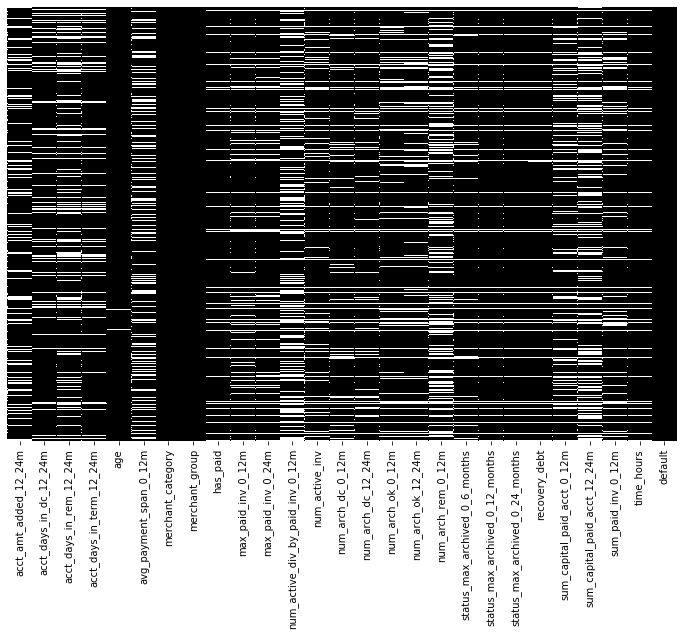

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sub.isnull(), cbar = False, cmap = 'bone', yticklabels = False)
plt.show()

In [36]:
df_sub_temp = df_sub[df_sub.isnull().sum(axis = 1) <= 5]

In [37]:
df_sub_temp.shape

(73061, 27)

In [38]:
df_sub_temp['default'].value_counts()

0.00    72206
1.00      855
Name: default, dtype: int64

In [39]:
df_sub_temp.isnull().sum().sort_values(ascending = False)/df_sub_temp.index.size

num_active_div_by_paid_inv_0_12m   0.31
avg_payment_span_0_12m             0.27
sum_capital_paid_acct_12_24m       0.20
num_arch_rem_0_12m                 0.20
acct_days_in_rem_12_24m            0.17
acct_amt_added_12_24m              0.14
sum_capital_paid_acct_0_12m        0.12
acct_days_in_term_12_24m           0.12
acct_days_in_dc_12_24m             0.11
num_arch_ok_12_24m                 0.07
num_arch_ok_0_12m                  0.06
max_paid_inv_0_24m                 0.05
sum_paid_inv_0_12m                 0.05
max_paid_inv_0_12m                 0.05
num_active_inv                     0.03
num_arch_dc_0_12m                  0.02
num_arch_dc_12_24m                 0.02
status_max_archived_0_6_months     0.01
age                                0.00
recovery_debt                      0.00
status_max_archived_0_24_months    0.00
time_hours                         0.00
has_paid                           0.00
merchant_group                     0.00
merchant_category                  0.00


In [40]:
df_final = df_sub_temp.isnull().sum().sort_values(ascending = False)/df_sub_temp.index.size

In [41]:
df_sub_temp.size

1972647

In [42]:
import numpy as np


numeric_columns = df_sub_temp.select_dtypes(include=[np.number])

infinite_values = np.isinf(numeric_columns.values).any()

Segregate the predictors and response

In [43]:
predictors = df_sub_temp.drop('default', axis = 1)
response = df_sub_temp['default']

#### Scale the predictors

In [44]:
from sklearn.preprocessing import StandardScaler

numerical_predictors = predictors.select_dtypes(include=['number'])


scaler = StandardScaler()


scaled_predictors = pd.DataFrame(scaler.fit_transform(numerical_predictors), columns=numerical_predictors.columns)

In [45]:
df_sub_temp = pd.concat([scaled_predictors, response], axis = 1)

In [46]:
df_sub_temp.columns

Index(['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'default'],
      dtype='object')

Summary statistics for acct_amt_added_12_24m:
count   62835.00
mean        0.00
std         1.00
min        -0.31
25%        -0.31
50%        -0.31
75%        -0.31
max         5.25
Name: acct_amt_added_12_24m, dtype: float64
Summary statistics for acct_days_in_dc_12_24m:
count   64774.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: acct_days_in_dc_12_24m, dtype: float64
Summary statistics for acct_days_in_rem_12_24m:
count   60285.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: acct_days_in_rem_12_24m, dtype: float64
Summary statistics for acct_days_in_term_12_24m:
count   64476.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: acct_days_in_term_12_24m, dtype: float64
Summary statistics for age:
count   72752.00
mean       -0.00
std         1.00
min  

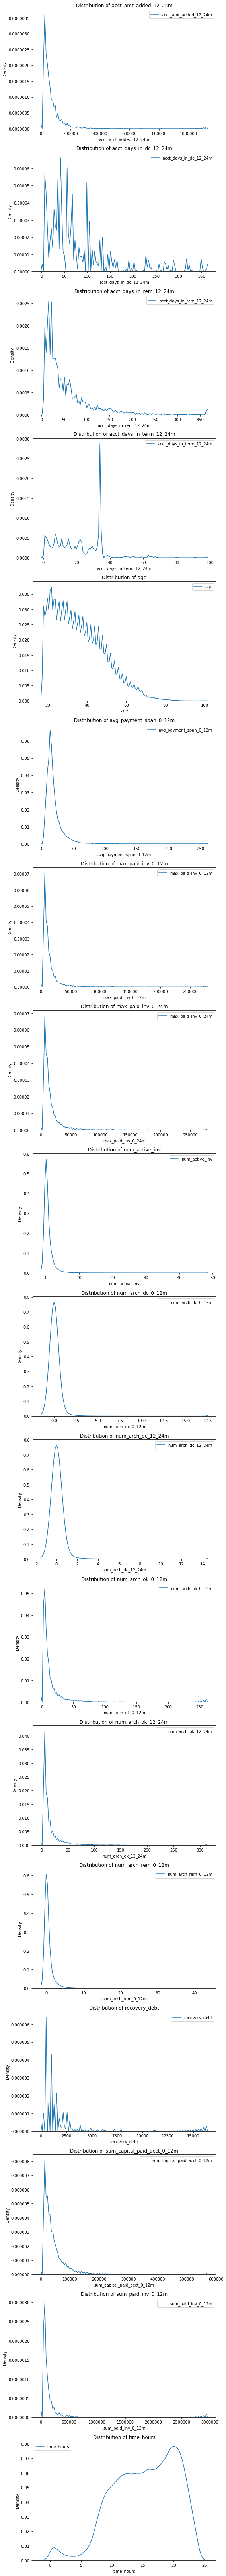

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = ['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m', 'acct_days_in_rem_12_24m',
                   'acct_days_in_term_12_24m', 'age', 'avg_payment_span_0_12m', 'max_paid_inv_0_12m',
                   'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
                   'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'recovery_debt',
                   'sum_capital_paid_acct_0_12m', 'sum_paid_inv_0_12m', 'time_hours']


fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 5 * len(numeric_columns)))


for i, column in enumerate(numeric_columns):
   
    print(f"Summary statistics for {column}:")
    print(df_sub_temp[column].describe())

   
    sns.kdeplot(df[column], bw=0.5, ax=axes[i])  # You can adjust the bandwidth (bw) value as needed
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")


plt.tight_layout()


plt.show()

Frequency count for status_max_archived_0_6_months:
0.40     38251
-1.17    26413
1.97      7837
Name: status_max_archived_0_6_months, dtype: int64


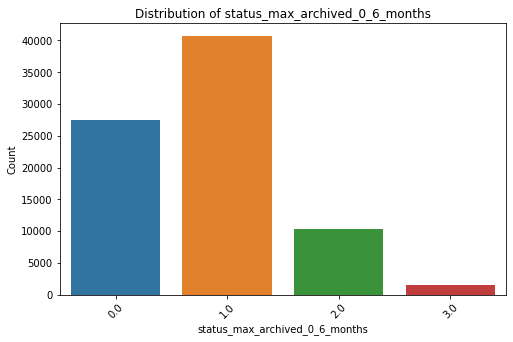

Frequency count for status_max_archived_0_12_months:
0.01     40344
-1.38    17359
1.39     13638
2.78      1720
Name: status_max_archived_0_12_months, dtype: int64


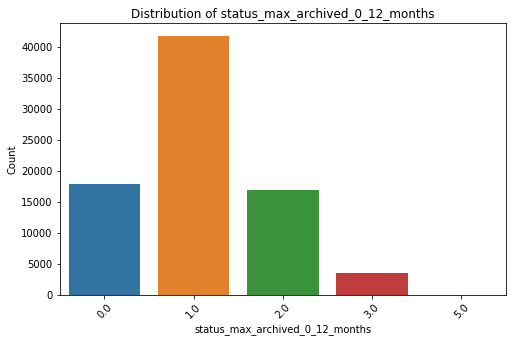

Frequency count for status_max_archived_0_24_months:
-0.21    37393
1.09     18970
-1.51    13509
2.39      3184
Name: status_max_archived_0_24_months, dtype: int64


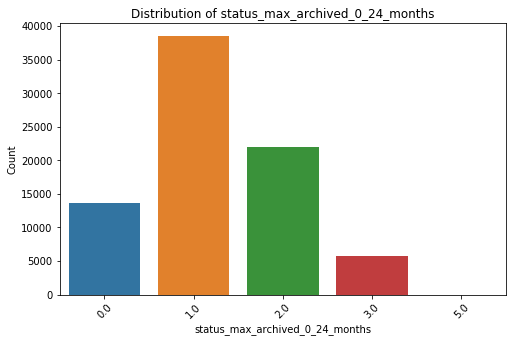

Frequency count for default:
0.00    72206
1.00      855
Name: default, dtype: int64


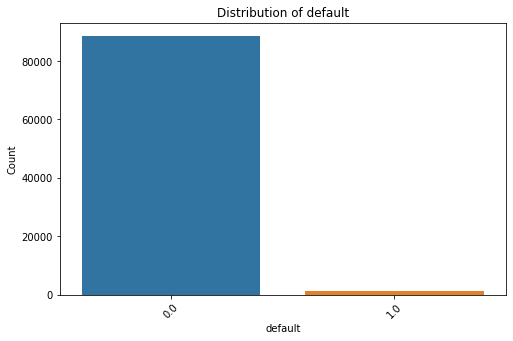

In [48]:

categorical_columns = ['status_max_archived_0_6_months', 'status_max_archived_0_12_months',
                       'status_max_archived_0_24_months', 'default']


for column in categorical_columns:
   
    print(f"Frequency count for {column}:")
    print(df_sub_temp[column].value_counts())

   
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [49]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Assuming you have imported pandas
import pandas as pd


numerical_columns = df_sub_temp.select_dtypes(include=['number']).columns
categorical_columns = df_sub_temp.select_dtypes(exclude=['number']).columns

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours', 'default'],
      dtype='object')

Categorical Columns:
Index([], dtype='object')


In [51]:
numeric_features = ['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours']

In [52]:
categorical_features = ['merchant_category', 'merchant_group', 'has_paid']

In [53]:
df_sub_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86753 entries, 0 to 89974
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   acct_amt_added_12_24m             62835 non-null  float64
 1   acct_days_in_dc_12_24m            64774 non-null  float64
 2   acct_days_in_rem_12_24m           60285 non-null  float64
 3   acct_days_in_term_12_24m          64476 non-null  float64
 4   age                               72752 non-null  float64
 5   avg_payment_span_0_12m            53278 non-null  float64
 6   max_paid_inv_0_12m                69400 non-null  float64
 7   max_paid_inv_0_24m                69054 non-null  float64
 8   num_active_div_by_paid_inv_0_12m  50462 non-null  float64
 9   num_active_inv                    70705 non-null  float64
 10  num_arch_dc_0_12m                 71367 non-null  float64
 11  num_arch_dc_12_24m                71377 non-null  float64
 12  num_

In [54]:

x = df_sub_temp.drop(columns=['default'], axis=1) 
y = df_sub_temp['default']  

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


imputer = SimpleImputer(strategy="mean")
df_sub_temp[numeric_features] = imputer.fit_transform(df_sub_temp[numeric_features])

In [56]:
df_sub_temp[numeric_features]

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,avg_payment_span_0_12m,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_div_by_paid_inv_0_12m,num_active_inv,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,-0.31,0.00,0.00,0.00,-1.24,-0.33,0.00,0.00,1.97,2.92,...,2.73,0.00,0.40,0.01,-0.21,0.00,-0.41,-0.08,0.00,-1.13
1,-0.31,0.00,0.00,0.00,1.16,1.52,1.25,0.85,-0.48,-0.54,...,-0.00,0.00,0.40,1.39,1.09,0.00,-0.41,-0.08,1.05,-0.43
2,-0.31,0.00,0.00,0.00,-1.08,0.70,0.00,0.00,0.66,1.19,...,-0.75,0.00,0.40,1.39,1.09,0.00,-0.41,-0.08,0.00,-0.75
3,-0.31,0.00,0.00,0.00,-0.84,-0.28,0.10,-0.14,-0.48,-0.54,...,-0.75,0.00,0.40,0.01,-0.21,0.00,-0.41,-0.08,-0.60,-0.53
4,-0.31,0.00,0.00,0.00,-1.40,-0.00,-1.12,-1.20,-0.00,-0.54,...,-0.75,0.00,-1.17,-1.38,-1.51,0.00,-0.41,-0.08,-0.89,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89969,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
89970,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
89972,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
89973,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00


In [57]:

scaler = StandardScaler()
numeric_transformer = Pipeline(steps=[('scaler', scaler)])

In [58]:

encoder = OneHotEncoder()
categorical_transformer = Pipeline(steps=[('onehot', encoder)])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [59]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [62]:
import pandas as pd

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)

# Now, you can proceed with your preprocessing and column transformations

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [64]:
import pandas as pd


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



In [65]:
X_train.head()

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,avg_payment_span_0_12m,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_div_by_paid_inv_0_12m,num_active_inv,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
39653,-0.31,0.00,0.00,0.00,2.28,0.16,1.41,1.00,1.64,2.92,...,0.74,0.00,0.40,0.01,-0.21,0.00,-0.41,-0.08,1.17,-1.34
44734,-0.31,0.00,0.00,0.00,1.40,nan,-1.12,-1.20,nan,-0.54,...,-0.75,0.00,-1.17,-1.38,-1.51,0.00,-0.41,-0.08,-0.89,0.90
58208,-0.31,0.00,0.00,0.00,-1.40,-0.35,0.73,0.40,-0.48,-0.54,...,-0.75,0.00,0.40,0.01,-0.21,0.00,-0.41,-0.08,-0.34,-0.36
48441,-0.31,0.00,0.00,0.00,0.44,0.39,0.39,0.11,1.80,2.92,...,1.73,0.00,0.40,0.01,-0.21,0.00,-0.41,-0.08,0.86,-0.38
18221,-0.31,0.00,0.00,0.00,-0.04,-0.32,0.13,0.14,3.50,2.92,...,0.49,0.00,0.40,0.01,-0.21,0.00,2.93,-0.08,0.76,0.59


In [66]:
X_test.head()

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,avg_payment_span_0_12m,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_div_by_paid_inv_0_12m,num_active_inv,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
27403,-0.31,0.00,0.00,0.00,-0.68,nan,-1.12,-1.20,nan,-0.54,...,-0.75,0.00,-1.17,-1.38,-1.51,0.00,-0.41,-0.08,-0.89,-0.87
17987,-0.31,0.00,0.00,0.00,-0.92,nan,-1.12,-0.47,nan,-0.54,...,-0.01,0.00,-1.17,-1.38,-0.21,0.00,-0.41,-0.08,-0.89,0.89
373,-0.31,0.00,0.00,0.00,-0.84,-0.67,0.27,0.82,-0.48,-0.54,...,-0.01,0.00,0.40,0.01,-0.21,0.00,nan,-0.08,-0.04,-0.98
2182,3.67,0.00,0.00,0.00,0.12,-0.94,0.44,0.15,0.02,1.19,...,nan,0.00,0.40,0.01,-0.21,0.00,-0.41,nan,nan,1.51
87625,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [67]:
num_rows, num_columns = X_train.shape


print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 69402
Number of columns: 23


#### DECISION TREE CLASSIFIER 

In [68]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=0)


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [70]:
# Initialize K-Means clustering model
kmeans = KMeans(random_state=0)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])


cluster_range = range(2, 11)  # e.g., from 2 to 10 clusters


silhouette_scores = []

In [71]:
silhouette_scores

[]

In [72]:
df_sub_temp.dropna(inplace=True)  

In [73]:

X_train_encoded = pd.get_dummies(X_train)

In [74]:


X_train_cleaned = df_sub_temp.drop(columns='default') 
y_train_cleaned = df_sub_temp['default']

cleaned_data = pd.concat([X_train_cleaned, y_train_cleaned], axis=1).dropna()


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_cleaned, y_train_cleaned)

DecisionTreeClassifier(random_state=0)

In [75]:

missing_cols = set(X_train_cleaned.columns) - set(X_train_cleaned.columns)
for col in missing_cols:
    X_train_cleaned[col] = 0

In [76]:
extra_cols = set(X_train_cleaned.columns) - set(X_train_cleaned.columns)
X_train_cleaned = X_train_cleaned.drop(columns=extra_cols)

In [77]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent')  
X_train_cleaned = imputer.fit_transform(x_train.values.reshape(-1, 1))
X_train_cleaned = X_train_cleaned.ravel() 

In [78]:


X_train_cleaned = df_sub_temp.drop(columns='default')  
y_train_cleaned = df_sub_temp['default']

cleaned_data = pd.concat([X_train_cleaned, y_train_cleaned], axis=1).dropna()


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_cleaned, y_train_cleaned)

DecisionTreeClassifier(random_state=0)

In [79]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent') 
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = y_train_imputed.ravel() 

In [80]:

dt_pred = dt_model.predict(X_train_cleaned)

In [81]:
from sklearn.metrics import accuracy_score, classification_report


dt_accuracy = accuracy_score(y_train_cleaned, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)


print(classification_report(y_train_cleaned, dt_pred))

Decision Tree Accuracy: 0.9978511107157033
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72206
         1.0       1.00      0.82      0.90       855

    accuracy                           1.00     73061
   macro avg       1.00      0.91      0.95     73061
weighted avg       1.00      1.00      1.00     73061



### K-Nearest Neighbors (KNN)

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [83]:


x_test_cleaned = df_sub_temp.drop(columns='default') 
y_test_cleaned = df_sub_temp['default']

cleaned_data = pd.concat([X_train_cleaned, y_train_cleaned], axis=1).dropna()

In [84]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_cleaned, y_train_cleaned)
knn_pred = knn_model.predict(x_test_cleaned)
knn_accuracy = accuracy_score(y_test_cleaned, knn_pred)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test_cleaned, knn_pred))

KNN Accuracy: 0.9882837628830703
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     72206
         1.0       0.00      0.00      0.00       855

    accuracy                           0.99     73061
   macro avg       0.49      0.50      0.50     73061
weighted avg       0.98      0.99      0.98     73061



### Naive Bayes

In [91]:

nb_model = GaussianNB()
nb_model.fit(X_train_cleaned, y_train_cleaned)
nb_pred = nb_model.predict(x_test_cleaned)
nb_accuracy = accuracy_score(y_test_cleaned, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test_cleaned, nb_pred))

Naive Bayes Accuracy: 0.9882974500759639
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     72206
         1.0       0.00      0.00      0.00       855

    accuracy                           0.99     73061
   macro avg       0.49      0.50      0.50     73061
weighted avg       0.98      0.99      0.98     73061



### AdaBoost

In [93]:

adaboost_model = AdaBoostClassifier(n_estimators=30, random_state=0)
adaboost_model.fit(X_train_cleaned, y_train_cleaned)
adaboost_pred = adaboost_model.predict(x_test_cleaned)
adaboost_accuracy = accuracy_score(y_test_cleaned, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)
print(classification_report(y_test_cleaned, adaboost_pred))

AdaBoost Accuracy: 0.9882974500759639
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     72206
         1.0       0.00      0.00      0.00       855

    accuracy                           0.99     73061
   macro avg       0.49      0.50      0.50     73061
weighted avg       0.98      0.99      0.98     73061



### Support Vector Machines (SVM)

In [94]:

svm_model = SVC(kernel='linear', C=1.0, random_state=0)
svm_model.fit(X_train_cleaned, y_train_cleaned)
svm_pred = svm_model.predict(x_test_cleaned)
svm_accuracy = accuracy_score(y_test_cleaned, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test_cleaned, svm_pred))

SVM Accuracy: 0.9882974500759639
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     72206
         1.0       0.00      0.00      0.00       855

    accuracy                           0.99     73061
   macro avg       0.49      0.50      0.50     73061
weighted avg       0.98      0.99      0.98     73061



### Random Forest

In [96]:

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_cleaned, y_train_cleaned)
rf_pred = rf_model.predict(x_test_cleaned)
rf_accuracy = accuracy_score(y_test_cleaned, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test_cleaned, rf_pred))

Random Forest Accuracy: 0.9977826747512353
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     72206
         1.0       1.00      0.81      0.90       855

    accuracy                           1.00     73061
   macro avg       1.00      0.91      0.95     73061
weighted avg       1.00      1.00      1.00     73061



## outlier treatment

In [108]:
final_data = pd.concat([X_train_cleaned, y_train_cleaned], axis=1).dropna()

In [109]:
def treat_outlier(x):
   
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
    print(q5,q25,q75,dt,min,max)
   
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [110]:
for i in final_data:
    final_data[i]=treat_outlier(df_sub_temp[i])

-0.3144802113573765 -0.3144802113573765 -8.141812202550682e-18 1.686261967095141 <built-in function min> <built-in function max>
0.0 0.0 0.0 0.0 <built-in function min> <built-in function max>
0.0 0.0 0.0 0.0 <built-in function min> <built-in function max>
0.0 0.0 0.0 0.0 <built-in function min> <built-in function max>
-1.319576748269693 -0.6795308285914652 0.5205552708052119 1.720641370201889 <built-in function min> <built-in function max>
-1.2285433512843886 -0.2828496258605328 -1.67506602371464e-16 1.591498298010365 <built-in function min> <built-in function max>
-1.115472490868676 -0.5846842943049849 0.2896561330442669 1.8208684256555108 <built-in function min> <built-in function max>
-1.1958054049455067 -0.5562059413651094 0.2951024355682402 1.8292466034568857 <built-in function min> <built-in function max>
-0.4812307177384425 -0.4812307177384425 -7.455756382723099e-17 1.7960218491302435 <built-in function min> <built-in function max>
-0.537605775810631 -0.537605775810631 -6.65270

In [113]:
final_data.shape

(73061, 24)

In [114]:
((final_data > UL) | (final_data < LL)).sum()

acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m                  0
acct_days_in_rem_12_24m                 0
acct_days_in_term_12_24m                0
age                                     0
avg_payment_span_0_12m                  0
default                                 0
max_paid_inv_0_12m                      0
max_paid_inv_0_24m                      0
num_active_div_by_paid_inv_0_12m    39781
num_active_inv                          0
num_arch_dc_0_12m                       0
num_arch_dc_12_24m                      0
num_arch_ok_0_12m                       0
num_arch_ok_12_24m                      0
num_arch_rem_0_12m                      0
recovery_debt                           0
status_max_archived_0_12_months     14146
status_max_archived_0_24_months     11012
status_max_archived_0_6_months          0
sum_capital_paid_acct_0_12m             0
sum_capital_paid_acct_12_24m            0
sum_paid_inv_0_12m                      0
time_hours                        

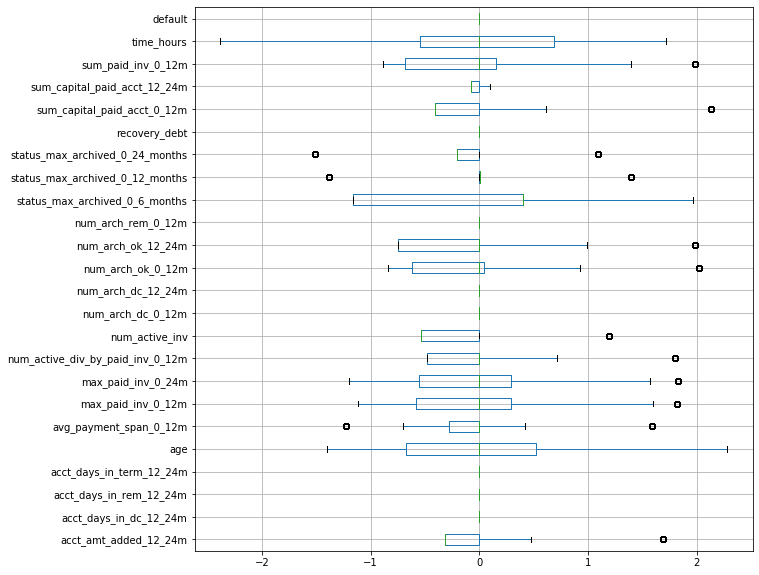

In [115]:
plt.figure(figsize=(10,10))
final_data.boxplot(vert=0)

# Model Building using Logistic Regression for 'Probability at default'
The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is y = 11−e−z

Note: z = β0

∑ni=1(βiX1)
Now, Importing statsmodels modules

In [116]:

x = final_data.drop(columns=['default'], axis=1) 
y = final_data['default'] 

In [117]:

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

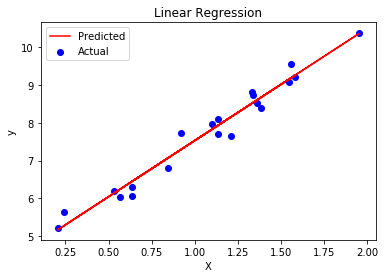

In [118]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred = linear_reg.predict(X_test)


plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



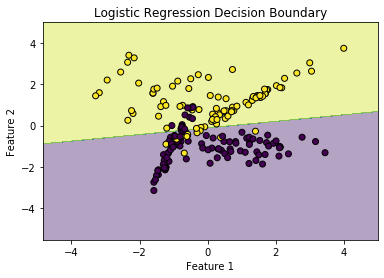

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


y_pred = logistic_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
